# Convolutional Neural Network

Importing important libraries.

In [1]:
import tensorflow as tf

In [30]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import numpy as np


Part 1 - Building CNN model.

Initialising the CNN model.

In [3]:
classifier = Sequential()

Step 1: Creating convolutional layers.

In [4]:
classifier.add(Convolution2D(32,3,3, input_shape = (64,64,3), activation = 'relu'))

C:\Users\91904\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


Step 2: Max Pooling

In [5]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

Step 3: Flattening

In [6]:
classifier.add(Flatten())

Step 4: Full Connection (Adding hidden layers)

In [7]:
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

C:\Users\91904\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
C:\Users\91904\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


Step 5: Compiling the model

In [8]:
classifier.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

Part 2 - Fitting the CNN model to the image.

In [9]:
from keras.preprocessing.image import ImageDataGenerator, load_img

In [22]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\91904\Desktop\training_set',
                                                  target_size=(64, 64),
                                                  batch_size=32,
                                                  class_mode='binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\91904\Desktop\test_set',
                                             target_size=(64, 64),
                                             batch_size=32,
                                             class_mode='binary')

classifier.fit_generator(training_set,
                         samples_per_epoch=8000,
                         epochs=50,
                         validation_data=test_set,
                         validation_steps=2000)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
Epoch 1/50


C:\Users\91904\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=50, validation_data=<keras.pre..., validation_steps=2000, steps_per_epoch=250)`


250/250 [==============================] - 379s 2s/step - loss: 0.6839 - accuracy: 0.6121 - val_loss: 0.6460 - val_accuracy: 0.6412
Epoch 2/50
250/250 [==============================] - 269s 1s/step - loss: 0.5967 - accuracy: 0.6827 - val_loss: 0.9872 - val_accuracy: 0.3825
Epoch 3/50
250/250 [==============================] - 281s 1s/step - loss: 0.5633 - accuracy: 0.7136 - val_loss: 0.4762 - val_accuracy: 0.7143
Epoch 4/50
250/250 [==============================] - 267s 1s/step - loss: 0.5500 - accuracy: 0.7214 - val_loss: 0.5277 - val_accuracy: 0.6741
Epoch 5/50
250/250 [==============================] - 258s 1s/step - loss: 0.5384 - accuracy: 0.7224 - val_loss: 1.0104 - val_accuracy: 0.4601
Epoch 6/50
250/250 [==============================] - 256s 1s/step - loss: 0.5230 - accuracy: 0.7383 - val_loss: 0.7872 - val_accuracy: 0.5001
Epoch 7/50
250/250 [==============================] - 255s 1s/step - loss: 0.5112 - accuracy: 0.7448 - val_loss: 0.7730 - val_accuracy: 0.5610
Epoch 8/50

In [23]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


Making predictions on my pets bunty and billu. :)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

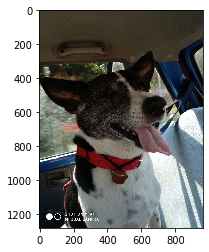

In [27]:
image = load_img(r'C:\Users\91904\Desktop\my pets\bunty.jpg')
plt.imshow(image)

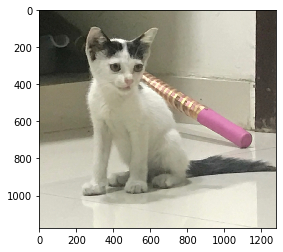

In [28]:
image = load_img(r'C:\Users\91904\Desktop\my pets\billu.jpg')
plt.imshow(image)

In [38]:
test_image = image.load_img(r'C:\Users\91904\Desktop\my pets\bunty.jpg', target_size=(64, 64))

In [32]:
test_image = image.img_to_array(test_image)

In [33]:
test_image = np.expand_dims(test_image, axis=0)

In [34]:
result = classifier.predict(test_image)

In [35]:
result

array([[0.]], dtype=float32)

In [36]:
training_set.class_indices

{'Dog': 0, 'cat': 1}

So, the prediction is correct.
Similary, lets check for my cat also.

In [39]:
test_image1 = image.load_img(r'C:\Users\91904\Desktop\my pets\billu.jpg', target_size=(64, 64))

In [40]:
test_image1 = image.img_to_array(test_image1)

In [41]:
test_image1 = np.expand_dims(test_image1, axis=0)

In [42]:
result1 = classifier.predict(test_image1)

In [43]:
result1

array([[1.]], dtype=float32)

In [44]:
training_set.class_indices

{'Dog': 0, 'cat': 1}

This is also a correct prediction.